# Visualisations

In [2]:
# Import libraries

import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import string
import json
import os
from sklearn.preprocessing import LabelEncoder
from nltk.stem.wordnet import WordNetLemmatizer
import re
import itertools
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import collections

## Data Cleaning
Ingredient list is cleaned by this function before create some visuals or analysises

In [3]:
def remove_numbers(ingredient):    
    return [[re.sub("\d+", "", x) for x in y] for y in ingredient]

def remove_special_chars(ingredient):   
    ingredient = [[x.replace("-", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("&", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("'", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("''", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("%", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("!", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("(", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(")", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("/", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace("/", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(",", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(".", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(u"\u2122", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(u"\u00AE", " ") for x in y] for y in ingredient] 
    ingredient = [[x.replace(u"\u2019", " ") for x in y] for y in ingredient] 

    return ingredient
    
def make_lowercase(ingredient):    
    return [[x.lower() for x in y] for y in ingredient]

def remove_extra_whitespace(ingredient):    
    return [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredient] 
    
    
def stem_words(ingredient):    
    lmtzr = WordNetLemmatizer()
    def word_by_word(strng):
        return " ".join(["".join(lmtzr.lemmatize(w)) for w in strng.split()])
    return [[word_by_word(x) for x in y] for y in ingredient] 
    
    
def remove_units(ingredient):    
    remove_list = ['g', 'lb', 's', 'n']
        
    def check_word(strng):
        
        s = strng.split()
        resw  = [word for word in s if word.lower() not in remove_list]
        
        return ' '.join(resw)

    return [[check_word(x) for x in y] for y in ingredient] 


In [4]:
# Retrieve Data

dataDir = os.path.join(os.getcwd(), "dataset")
dataPath = os.path.join(dataDir, "train.json")
with open(dataPath, 'r') as recipe:
    recipes = json.load(recipe)
    
cuisines = [] #All cuisine name
countmeal = [0]*20

for dish in recipes:
    cuisines.append(dish['cuisine'])

cuisines = list(set(cuisines))
BoWofCuisines = [[] for _ in range(len(cuisines))]

for dish in recipes:
    BoWofCuisines[cuisines.index(dish['cuisine'])].extend(dish['ingredients'])
    countmeal[cuisines.index(dish['cuisine'])] += 1
    

In [5]:

BoWofCuisines = remove_numbers(BoWofCuisines)
BoWofCuisines = remove_special_chars(BoWofCuisines)
BoWofCuisines = make_lowercase(BoWofCuisines)
BoWofCuisines = remove_extra_whitespace(BoWofCuisines)
BoWofCuisines = stem_words(BoWofCuisines)
BoWofCuisines = remove_units(BoWofCuisines)


# wholeInd = [ing for ing in wholeInd if ing.isalpha()]
# stop_words = set(stopwords.words('english'))
# wholeInd = [ing for ing in wholeInd if ing not in stop_words]
# wholeInd = [w.lower() for w in wholeInd] # convert all letter to lowercase
# ps=PorterStemmer()
# wholeInd = [ps.stem(ing) for ing in wholeInd]
# wholeInd = [ing for ing in wholeInd if len(ing)>=3]

In [6]:
# Put all ingredient in oone bag-of-word
all_ind = []

for i in range(len(BoWofCuisines)):
    for ing in BoWofCuisines[i]:
        all_ind.append(ing)

In [7]:
#write clean data in a txt file  
for i in  range(1, len(BoWofCuisines)+1):
    bookWr = open('cuisine{0}.txt'.format(i),"w")
    bookWr.write("%s\n" % BoWofCuisines[i-1])
    bookWr.close()


In [97]:
bookWr = open('wholeInd.txt',"w")
bookWr.write("%s\n" % wholeInd)
bookWr.close()

In [8]:
filenames = ['cuisine1.txt','cuisine2.txt','cuisine3.txt','cuisine4.txt','cuisine5.txt',
            'cuisine6.txt','cuisine7.txt','cuisine8.txt','cuisine9.txt','cuisine10.txt',
            'cuisine11.txt','cuisine12.txt','cuisine13.txt','cuisine14.txt','cuisine15.txt',
            'cuisine16.txt','cuisine17.txt','cuisine18.txt','cuisine19.txt','cuisine20.txt']
# vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.05)
vectorizer = CountVectorizer(input='filename',max_df=0.85, min_df=0.05)


dtm = vectorizer.fit_transform(filenames)  # a sparse matrix

ingr = vectorizer.get_feature_names()  # a list

dtm = dtm.toarray()  # convert to a regular array
ingr = np.array(ingr)

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

eu_dist = euclidean_distances(dtm) #Eucidean Distance
co_dist = 1 - cosine_similarity(dtm) #Cosine Similarity

np.round(eu_dist, 2)

array([[   0.  , 2025.48, 1256.07, 1123.16,  536.76,  407.25, 2364.23,
         736.81,  292.31, 1757.28,  273.05,  309.02,  299.27,  306.54,
         751.93,  612.67,  437.24,  345.31,  756.94,  297.23],
       [2025.48,    0.  , 2244.66, 2262.  , 1908.11, 2099.54, 2758.89,
        2163.16, 2082.67, 2696.53, 2083.57, 2076.36, 2091.  , 2064.69,
        2146.29, 2017.12, 2086.87, 2086.08, 1916.36, 2084.52],
       [1256.07, 2244.66,    0.  , 1639.89, 1229.39, 1297.1 , 2551.73,
        1428.86, 1260.62, 2129.46, 1250.69, 1181.05, 1250.48, 1204.41,
        1437.12, 1235.17, 1306.21, 1299.93, 1434.78, 1251.22],
       [1123.16, 2262.  , 1639.89,    0.  , 1200.63, 1050.62, 2615.83,
        1144.5 , 1030.46, 2037.88, 1101.45, 1107.29, 1098.18, 1108.43,
        1086.47, 1233.3 ,  969.07, 1140.02, 1330.45, 1103.84],
       [ 536.76, 1908.11, 1229.39, 1200.63,    0.  ,  628.09, 2400.11,
         867.84,  567.76, 1823.39,  545.11,  530.88,  570.25,  489.86,
         888.87,  753.95,  648.97,  61

In [13]:
norms = np.sqrt(np.sum(dtm * dtm, axis=1, keepdims=True))  # multiplication between arrays is element-wise

dtm_normed = dtm / norms

similarities = np.dot(dtm_normed, dtm_normed.T)

np.round(similarities, 2)

# similarities between *cuisine1* and *cuisine2* is
similarities[0, 1]

0.3360614379715326

## K-Means

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_k = 4
KM_model = KMeans(n_clusters=true_k)
KM_model.fit(dtm)

names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
names = list(map(str, names))


cuisine_names = [i for i in cuisines]

clusters= KM_model.labels_.tolist()

books = {'title': names, 'cluster': clusters }

frame = pd.DataFrame(books, index = [clusters] , columns = ['title','cluster'])

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(eu_dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

/Users/saidnur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


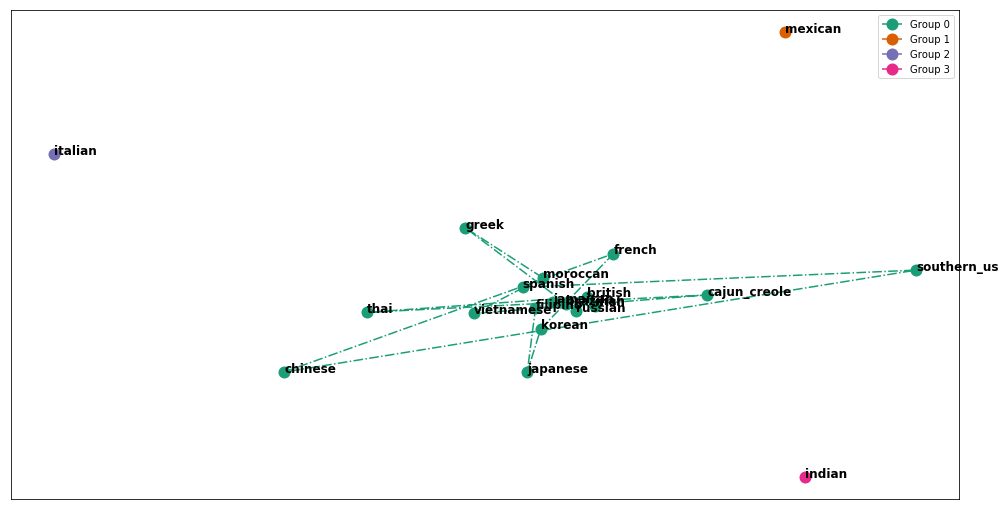

In [16]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#CCA785'}
#set up cluster names using a dict
cluster_names = {0: 'Group 0', 
                 1: 'Group 1', 
                 2: 'Group 2', 
                 3: 'Group 3', 
                 4: 'Group 4',
                 5: 'Group 5'}

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=cuisine_names)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='-.', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the cuisine's name
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=12, fontweight='bold') 

    
    
# plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('kmeans.png', dpi=200)

In [17]:

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(co_dist)



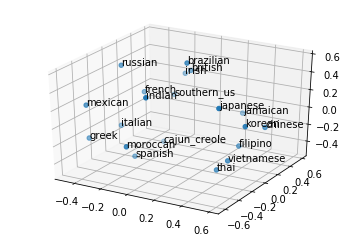

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], cuisine_names):
    ax.text(x, y, z, s)
    
plt.show()

## Hierarchical Clustering 

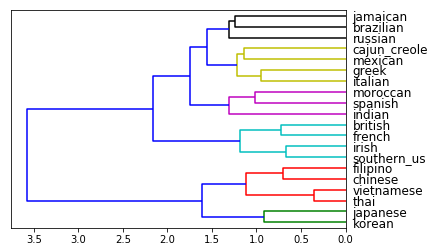

In [19]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(co_dist)

dendrogram(linkage_matrix, orientation="left", labels=cuisine_names, color_threshold=1.5)

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')

# plt.tight_layout()  # fixes margins

plt.show()
# plt.savefig('dend.png',bbox_inches='tight')

In [33]:
print(cuisines[1]) 
print(BoWofCuisines[1])

thai
['sugar', 'hot chili', 'asian fish sauce', 'lime juice', 'pork loin', 'roasted peanut', 'chopped cilantro fresh', 'hoisin sauce', 'creamy peanut butter', 'chopped fresh mint', 'thai basil', 'rice', 'medium shrimp', 'water', 'rice noodle', 'beansprouts', 'egg', 'shallot', 'firm tofu', 'beansprouts', 'turnip', 'palm sugar', 'vegetable oil', 'garlic clove', 'sliced chicken', 'fish sauce', 'lime wedge', 'roasted peanut', 'green papaya', 'chile powder', 'ground black pepper', 'tamarind paste', 'chinese chive', 'sugar', 'chicken thigh', 'cooking oil', 'fish sauce', 'garlic', 'black pepper', 'lemongrass', 'large garlic clove', 'rice', 'unsweetened coconut milk', 'fresh ginger', 'peanut sauce', 'sparerib', 'sesame oil', 'tamari soy sauce', 'golden brown sugar', 'dry sherry', 'boiling water', 'extra firm tofu', 'coconut milk', 'fresh basil', 'red curry paste', 'eggplant', 'red bell pepper', 'vegetable oil', 'onion', 'sriracha', 'unsalted cashew', 'thai green curry paste', 'light soy sauce'

## Word Clouds

In [16]:
def create_clouds(wordlist):
    wordlist = ''.join(str(e) for e in wordlist)
    wordcloud = WordCloud(width = 1000, height = 500,max_words=10000).generate(''.join(wordlist))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

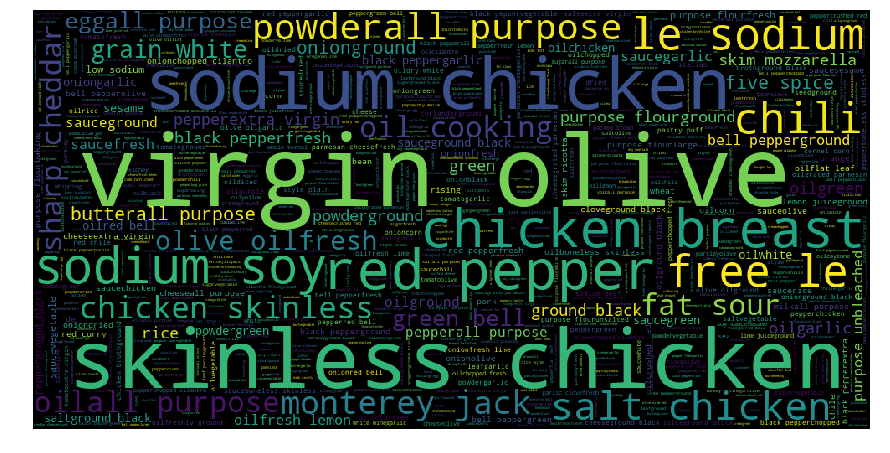

In [49]:
# All ingrendient in all cusine

wholeInd = []
uz = len(all_ind)
freq = counter=collections.Counter(all_ind)

#Delete all words which have frequency below 5 percent or above 80 percent
for item in all_ind:
    if (freq[item] / uz) <0.05 and (freq[item]>0.8):
        wholeInd.append(item)
        
create_clouds(wholeInd)

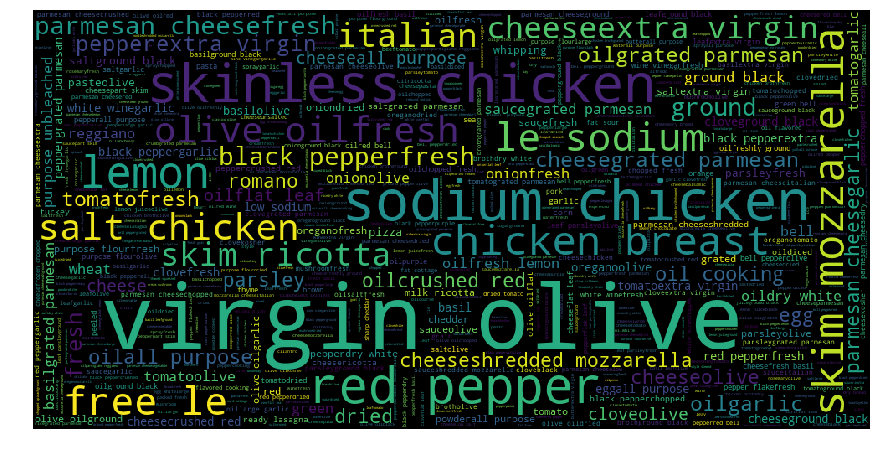

In [50]:
# wordClouds for each cusines

create_clouds(BoWofCuisines[cuisines.index('italian')])

In [20]:
from collections import Counter

cmnwords = [] # Common words matrix

#Find most common ingredient for each cuisine
for i in range(20):
    cmnwords.append(Counter(BoWofCuisines[i]).most_common(10))

# Show just name of top ingredient
for i in range(0,20):
    for j in range(0,10):
        cmnwords[i][j] = cmnwords[i][j][0]
    

In [21]:
rowsname = ['1','2','3','4','5','6','7','8','9','10']
nrow = [_ for _ in cuisines]
ncol = [_ for _ in rowsname]

df = pd.DataFrame(cmnwords, index=nrow, columns=ncol)

df

,1,2,3,4,5,6,7,8,9,10
spanish,salt,olive oil,garlic clove,extra virgin olive oil,onion,water,tomato,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic clove,grated parmesan cheese,garlic,ground black pepper,extra virgin olive oil,onion,water,butter
southern_us,salt,butter,all purpose flour,sugar,large egg,baking powder,water,unsalted butter,milk,buttermilk
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onion,vegetable oil,scallion
french,salt,sugar,all purpose flour,unsalted butter,olive oil,butter,water,large egg,garlic clove,ground black pepper
korean,soy sauce,sesame oil,garlic,green onion,sugar,salt,water,sesame seed,onion,scallion
mexican,salt,onion,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortilla
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallion,ginger
filipino,salt,garlic,water,onion,soy sauce,pepper,oil,sugar,carrot,ground black pepper
indian,salt,onion,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil


## Average Number of Ingredients for each Cuisine 

In [22]:
avgIng = [0]*20
for i in range(len(cuisines)):
    avgIng[i] = len(BoWofCuisines[i]) / countmeal[i]


pdAvg = pd.DataFrame(data= {'avg':avgIng, 'cuisine': cuisines})
    

# len(BoWofCuisines[cuisines.index('korean')]) / countmeal[cuisines.index('korean')]

In [23]:
pdAvg.to_csv("pdAvg.csv", sep=",", encoding='utf-8')

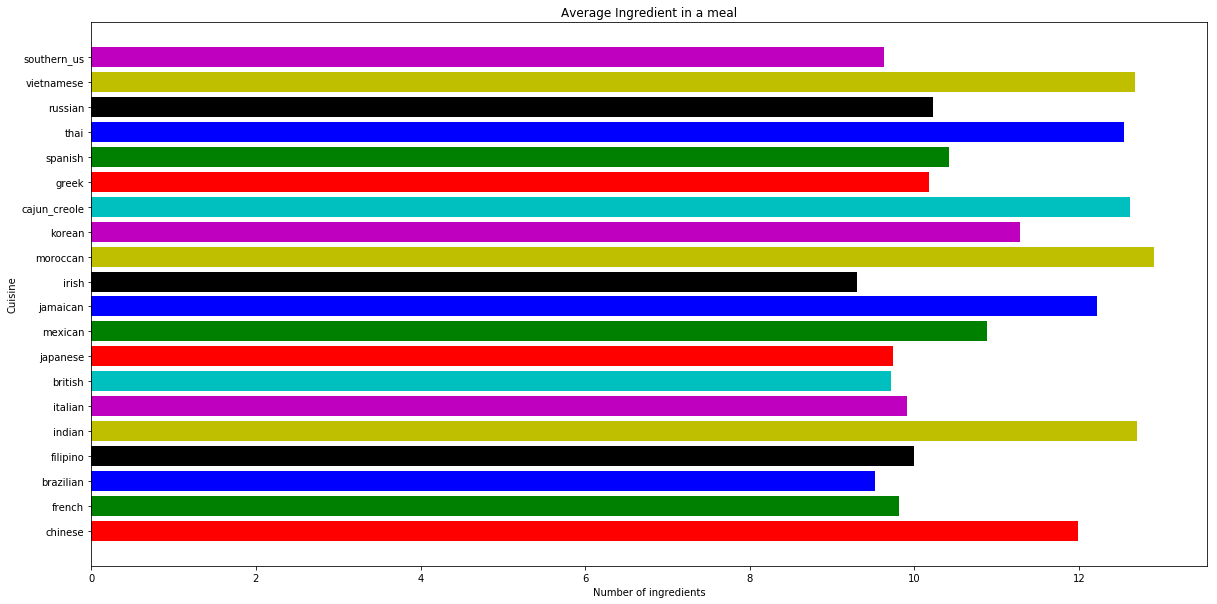

In [59]:
"""
Find a meal from different cuisines consist of how many ingredients.. 

"""
my_colors = 'rgbkymc'  #red, green, blue, black, etc.


# Plot the Average ingredient.
pos = np.arange(len(cuisines)) + 0.5
plt.figure(figsize=(20, 10))
plt.barh(pos, avgIng, align='center', color=my_colors)
plt.yticks(pos, cuisines)
plt.xlabel('Number of ingredients')
plt.ylabel('Cuisine')
plt.title('Average Ingredient in a meal')

plt.show()